### Amazon Book Reviews: Review of the top 50 reviewers: Clustering and feature selection from review text

The original dataset has ~9 million reviews: http://jmcauley.ucsd.edu/data/amazon/.  I have created a subset which contains data of reviewers who have done maximum number of reviews. I did an EDA on the dataset in part I of this notebook. I noticed that some reviewers sound like a corporate name, e.g., Midwest Book Reviews whereas others are individual personnel, e.g., Harriet Klausner. Here we will see if we can differentiate between corporate and individual accounts by reviewing their review texts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('top50reviews.csv')

In [3]:
df.tail(2)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary
128756,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",0439895294,241,252,2007-09-30 00:00:00 UTC,There are some books that come across my plate...,1622,5,Beautiful doesn't even cover it
128757,A22RY8N8CNDF3A,"Loyd E. Eskildson ""Pragmatist""",0061429252,464,510,2011-09-20 00:00:00 UTC,"Suskind's ""Confidence Men"" is based on 746 hou...",1078,5,Objective Look at Presidential Leadership


#### I made two more tables for book titles and their ranks from the review metadata. Here I am going to merge them with the top 50 reviewer data. 

In [4]:
df1 = pd.read_csv("book_titles_new.csv")
df1.head(1)

,asin,title
0,0001048791,"The Crucible: Performed by Stuart Pankin, Jero..."


In [5]:
df = df.merge(df1, on ='asin')
df.tail(2)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,title
128756,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",0307338312,220,248,2008-02-24 00:00:00 UTC,Deepak Chopra's new book is not quite as contr...,312,3,Is Jesus just an Enlightened Master?,The Third Jesus: The Christ We Cannot Ignore
128757,A14OJS0VWMOSWO,Midwest Book Review,0895949903,248,251,2001-03-12 00:00:00 UTC,The Herbal Medicine-Makers Handbook blends the...,58,5,Far more in-depth than your usual herbal recip...,The Herbal Medicine-Maker's Handbook: A Home M...


In [6]:
df2 = pd.read_csv("books_rank_cleaned.csv")
df2.head(1)

,Unnamed: 0,asin,rank
0,0,0001048791,6334800.0


In [7]:
df2 = df2.drop("Unnamed: 0", axis =1)

In [8]:
df2.head(1)

,asin,rank
0,0001048791,6334800.0


In [9]:
df = df.merge(df2, on ='asin')
df.tail(2)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,title,rank
128756,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",0307338312,220,248,2008-02-24 00:00:00 UTC,Deepak Chopra's new book is not quite as contr...,312,3,Is Jesus just an Enlightened Master?,The Third Jesus: The Christ We Cannot Ignore,461913.0
128757,A14OJS0VWMOSWO,Midwest Book Review,0895949903,248,251,2001-03-12 00:00:00 UTC,The Herbal Medicine-Makers Handbook blends the...,58,5,Far more in-depth than your usual herbal recip...,The Herbal Medicine-Maker's Handbook: A Home M...,8306.0


#### Let's take the reviews with at least 2 votes and then sample a subset of 10000. 

In [10]:
dr = df[df.totalVote > 1]
len(dr)

81639

In [11]:
dr1 = dr.sample(n = 10000)
dr1.head(1)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,title,rank
115100,A14OJS0VWMOSWO,Midwest Book Review,1741791472,7,10,2011-01-18 00:00:00 UTC,"Carolyn McCarthy, et.al.'s CENTRAL AMERICA ON ...",72,5,Perfect for young travelers in particular,Lonely Planet Central America (Shoestring Trav...,215725.0


In [12]:
len(dr1)

10000

In [13]:
dr1.reviewerName.value_counts()

Harriet Klausner                                    2227
Midwest Book Review                                 1385
Bookreporter                                         555
Grady Harp                                           268
Donald Mitchell "Jesus Loves You!"                   266
MNix                                                 248
Loyd E. Eskildson "Pragmatist"                       237
Armchair Interviews                                  234
John Matlock "Gunny"                                 226
Arthur W. Jordin                                     177
Gail Cooke                                           168
Rolf Dobelli "getAbstract"                           167
Charles Ashbacher                                    166
Robert Morris                                        166
Shalom Freedman "Shalom Freedman"                    164
The RAWSISTAZ Reviewers                              158
Robert Beveridge "xterminal"                         153
Luan Gaines "luansos"          

#### Now let's separate corporate accounts from individuals. I am not sure of a better way of doing it programmatically. I did it manually just by looking at names.

** Corporate accounts** 
A14OJS0VWMOSWO, Midwest Book Review, A2F6N60Z96CAJI, Bookreporter, A320TMDV6KCFU, MNix, 
A13QTZ8CIMHHG4, LAS Reviewer "The Long and the Short Of It Re..., A2TX179XAT5GRP, TeensReadToo "Eat. Drink. Read. Be Merrier."
A21NVBFIEQWDSG, Armchair Interviews, A2VKWLCNZF4ZVB, The RAWSISTAZ Reviewers, A1JKGTL51HHTU1, Under The Covers Book Blog, 
A26J2TRDPZH7RZ, Romancing the Book, A2CR57GAJKNWVV, booksforabuck "BooksForABuck", A3U7ELIED4WP4R, Dark Faerie Tales

In [14]:
corporate_list = ["A14OJS0VWMOSWO", "A2F6N60Z96CAJI", "A320TMDV6KCFU", "A13QTZ8CIMHHG4", "A2TX179XAT5GRP",
                 "A21NVBFIEQWDSG", "A2VKWLCNZF4ZVB", "A1JKGTL51HHTU1", "A26J2TRDPZH7RZ", "A2CR57GAJKNWVV", "A3U7ELIED4WP4R"]

In [15]:
dr2 = dr1.replace([corporate_list], 'corporate')
dr2.tail()

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,title,rank
110667,AFVQZQ8PW0L,Harriet Klausner,0765364751,4,8,2012-10-30 00:00:00 UTC,Backcountry ranger Will McCarroll protects the...,292,5,exciting vivid thriller,Trapped,787082.0
13366,A2MF2QVSCUI27G,"Luan Gaines ""luansos""",0307266869,8,12,2007-08-22 00:00:00 UTC,"The Chicago Way is a tough, provocative take o...",480,4,"""What is friendship? It's one soul living in t...",The Chicago Way,1204985.0
108457,corporate,Midwest Book Review,0306810719,0,7,2001-01-23 00:00:00 UTC,"This superb history of the Knights Templar, th...",52,5,A superb history of the Knights Templar,The Templars: The Dramatic History Of The Knig...,1762208.0
79710,corporate,"LAS Reviewer ""The Long and the Short Of It Re...",B00826OCRG,2,2,2012-07-23 00:00:00 UTC,There's always a way out. The trick is to stic...,271,5,Recommended Read! Best Book!,NaN,NaN
85779,A26JGAM6GZMM4V,Robert Morris,1576751074,19,21,2000-11-12 00:00:00 UTC,"The title is somewhat misleading. In fact, all...",350,4,Valuable Guidelines...Not Unbreakable Laws,The 100 Absolutely Unbreakable Laws of Busines...,278236.0


In [16]:
dr2_corporate = dr2[dr2.reviewerID == "corporate"]
len(dr2_corporate)

3099

In [17]:
dr2_individual = dr2[dr2.reviewerID != "corporate"]
len(dr2_individual)

6901

In [18]:
individual_list = dr2_individual.reviewerID

In [19]:
dr3_individual = dr2_individual.replace([individual_list], "individual")
dr3_individual.head(2)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,title,rank
109125,individual,"S. Schwartz ""romonko""",0380780860,7,7,2006-08-16 00:00:00 UTC,This is the first in the Southern Sisters cozy...,119,3,Offbeat heroines and fun and hijinks in Alabama,Murder on a Girls' Night Out: A Southern Siste...,45468.0
98795,individual,Harriet Klausner,0778320022,4,5,2003-02-02 00:00:00 UTC,The Kiss River lighthouse off the North Caroli...,218,4,well-written contemporary romance,Kiss River (Mira),1202689.0


In [20]:
dr4_individual = dr3_individual.sample(n = 3128) # Taking 3128 samples because the corporate list also contains the same.
len(dr4_individual)

3128

In [21]:
dr4 = pd.concat([dr2_corporate, dr4_individual]) # The list where reviewerIds are categorzed as corporate and individual

In [22]:
len(dr4)

6227

Now we will create some functions for text analysis. Some of these codes are from http://brandonrose.org/clustering

In [23]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [24]:
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
from sklearn.feature_extraction import text
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA, KernelPCA

In [25]:
add_text = ["book"]

In [26]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(add_text)

In [27]:
stemmer = SnowballStemmer("english")

Now we will create a vocabulary dictionary from the review summary. Here I am taking summary but also can do that fromreview txt itself. Remember there are two columns for texts and summary. 

In [28]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in dr4.summary:
    allwords_stemmed = tokenize_and_stem(i) 
    totalvocab_stemmed.extend(allwords_stemmed) 

    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
vocab_frame = vocab_frame.drop(add_text)
vocab_frame.head()

,words
perfect,perfect
for,for
young,young
travel,travelers
in,in


In [29]:
vocab_frame.shape

(41800, 1)

Now let's use Term frequency inverse document frequency (Tfidf) vectorizer to get features from the summary.

In [30]:
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, max_features=5000,
                                     min_df=0.0, stop_words=set(my_stop_words),
                                     use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

In [31]:
%time tfidf_matrix = tfidf_vectorizer.fit_transform(dr4.summary) 

Wall time: 2.64 s


In [32]:
terms = tfidf_vectorizer.get_feature_names()
terms[:10]

[u"'d",
 u"'m",
 u"'s",
 u"'s actual",
 u"'s best",
 u"'s best novel",
 u"'s best work",
 u"'s biographi",
 u"'s bit",
 u"'s classic"]

In [33]:
tfidf_vocab = tfidf_vectorizer.vocabulary_
tfidf_vocab = pd.DataFrame(tfidf_vocab.items(), columns = ['term', 'freq'])
tfidf_vocab.sort_values(by = 'freq', ascending = False)[:10]

,term,freq
2450,~under cover,4999
4198,~under,4998
2652,zest,4997
1610,zen,4996
2956,zani,4995
3477,young reader,4994
3692,young peopl,4993
3737,young girl 's,4992
2629,young girl,4991
3333,young adult fantasi,4990


In [34]:
tfidf_vocab.shape # since we have taken 5000 max features

(5000, 2)

In [35]:
dense = tfidf_matrix.todense()
dense

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [36]:
dense = tfidf_matrix.todense()
len(dense[0].tolist()[0])
review_dense = dense[0].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(review_dense)), review_dense)]
len(phrase_scores)

5000

In [37]:
top_numbers = 100
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
top_words = []
top_score = []
top =[]
for phrase, score in [(terms[word_id], score) 
    for (word_id, score) in sorted_phrase_scores][:top_numbers]:
        #print('{0: <20} {1}'.format(phrase, round(score,5)))
        top.append({'Feature_Name':phrase, 'Score':score})
        top_words.append(phrase)
        top_score.append(int(score*100))

pd.DataFrame(top)[:10]

,Feature_Name,Score
0,particular,0.549091
1,travel,0.529649
2,young,0.460502
3,perfect,0.453771
4,'d,0.000000
5,'m,0.000000
6,'s,0.000000
7,'s actual,0.000000
8,'s best,0.000000
9,'s best novel,0.000000


#### We can do PCA on the dense matrix to visualize the clusters

In [38]:
%time pca = PCA(n_components=2).fit(dense)
data2D = pca.transform(dense)

Wall time: 2.95 s


In [39]:
dataframe1 = pd.DataFrame(dict(x=data2D[:,0], y=data2D[:,1], reviewer=dr4.reviewerID))
dataframe1.head(3)

,reviewer,x,y
115100,corporate,-0.030076,-0.020820
49936,corporate,0.062082,0.140241
111043,corporate,-0.029592,-0.020150


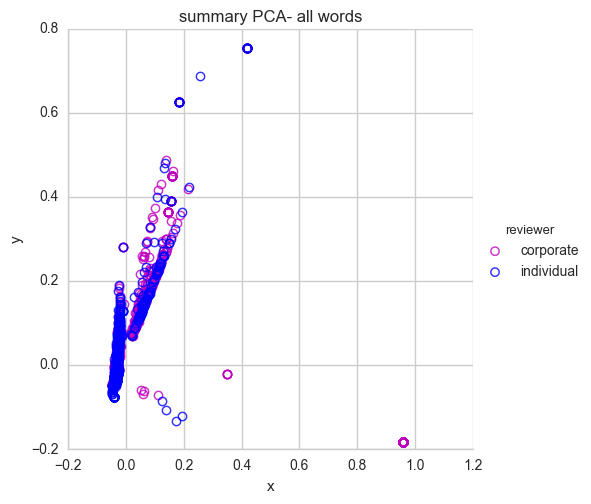

In [40]:
sns.set_style("whitegrid")
import matplotlib as mpl
pts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)
sns.lmplot(x = 'x', y = 'y', hue = "reviewer", data=dataframe1, fit_reg= False, scatter_kws={"s": 50}, 
                markers=open_circle, palette=dict(corporate="m", individual="b")) #scatter_kws={"s": 50}
plt.ylim([-0.2, 0.8])
plt.title ("summary PCA- all words")
plt.show()

I don't see much separation between corporate and individuals in a 2D PCA. I can make a vocabulary which contains book genre's and pass it through the tfidf vectorizer. This is to see if the two groups can be separated using frequencies of these words.

In [41]:
vocab = ["romance", "mystery", "drama", "fiction", "teen", "teens", "biography", "story", "tale", "animal", "family", "fun", 
         "horror", "comedy", "action", "classic", "crime", "fantasy", "humor", "children", "kid", "families","conceptual",
        "innovation", "traumas", "style", "fashion", "social", "issues", "collection", "science", "period", "photographs",
        "historical", "murder", "suspenseful", "suspence", "inspirational", "graphic", "instructions", "thriller", "adventure",
        "western", "textbook", "legal", "action-packed", "career", "information", "contemporary",
        "mature", "adult", "military", "marine", "cops", "agriculture", "history", "photography","academic", "academy",
        "geography", "myth", "mythology", "paranormal", "essay", "self-help", "memoir", "autobiography", 
         "romantic", "fairy tale", "science fiction", "religion", "jesus"]
#vocab = ["romance"]
tfidf_vectorizer_genre = TfidfVectorizer(#max_df=1.0, max_features=5000,
                                     #min_df=0.0, 
                                        stop_words=set(my_stop_words),
                                     use_idf=True, 
                            tokenizer=tokenize_and_stem, ngram_range=(1, 3), vocabulary = vocab)
%time tfidf_matrix_genre = tfidf_vectorizer_genre.fit_transform(dr4.summary) 

Wall time: 2.09 s


In [42]:
tfidf_matrix_genre.shape

(6227, 72)

In [43]:
tfidf_vocab_genre = tfidf_vectorizer_genre.vocabulary_
tfidf_vocab_genre = pd.DataFrame(tfidf_vocab_genre.items(), columns = ['term', 'freq'])
tfidf_vocab_genre = tfidf_vocab_genre.sort_values(by = 'freq', ascending = False)
tfidf_vocab_genre.reset_index()[:10]

,index,term,freq
0,4,jesus,71
1,47,religion,70
2,30,science fiction,69
3,14,fairy tale,68
4,28,romantic,67
5,43,autobiography,66
6,53,memoir,65
7,6,self-help,64
8,0,essay,63
9,31,paranormal,62


In [44]:
tfidf_matrix_genre

<6227x72 sparse matrix of type '<type 'numpy.float64'>'
	with 1127 stored elements in Compressed Sparse Row format>

In [45]:
tfidf_matrix_genre_dense = tfidf_matrix_genre.todense()

In [46]:
%time pca = PCA(n_components=2).fit(tfidf_matrix_genre_dense)
data2D_genre = pca.transform(tfidf_matrix_genre_dense)

Wall time: 65 ms


In [47]:
dataframe2 = pd.DataFrame(dict(x=data2D_genre[:,0], y=data2D_genre[:,1], reviewer=dr4.reviewerID))
dataframe2.head(3)

,reviewer,x,y
115100,corporate,-0.032173,-0.015361
49936,corporate,-0.032173,-0.015361
111043,corporate,-0.032173,-0.015361


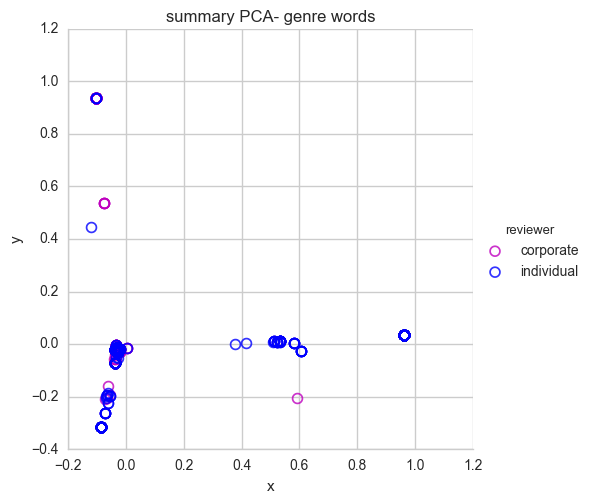

In [48]:
sns.set_style("whitegrid")
import matplotlib as mpl
pts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)
sns.lmplot(x = 'x', y = 'y', hue = "reviewer", data=dataframe2, fit_reg= False, scatter_kws={"s": 70}, 
                markers=open_circle, palette=dict(corporate="m", individual="b")) #scatter_kws={"s": 50}
plt.title ("summary PCA- genre words")

A fewer number of clusters but still no visible separations between individual and corporates. Now we can cluster them using all words and genre words PCA data. Let's figure out the optimum number of clusters using the elbow method.  

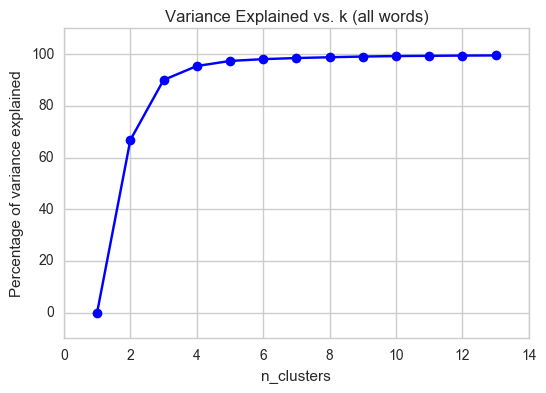

In [49]:
import numpy as np
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# Determine your k range
k_range = range(1,14)

# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(n_clusters=k).fit(data2D) for k in k_range]

# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid = [cdist(data2D, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# The total sum of squares
tss = sum(pdist(data2D)**2)/data2D.shape[0]

# The between-cluster sum of squares
bss = tss - wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'bo-')
ax.set_ylim((-10,110))
#plt.grid(True)
plt.xlabel('n_clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs. k (all words)')

optimum numbers of clusters 4 or 5 for all words. 

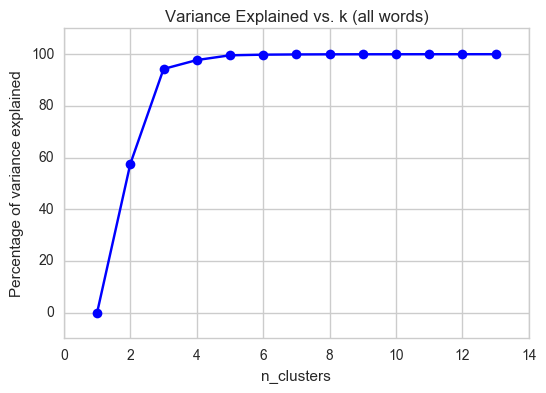

In [50]:
# Determine your k range
k_range = range(1,14)

# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(n_clusters=k).fit(data2D_genre) for k in k_range]

# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid = [cdist(data2D_genre, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# The total sum of squares
tss = sum(pdist(data2D_genre)**2)/data2D_genre.shape[0]

# The between-cluster sum of squares
bss = tss - wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'bo-')
ax.set_ylim((-10,110))
#plt.grid(True)
plt.xlabel('n_clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs. k (all words)')

optimum numbers of clusters 4 or 5 for genre words. Now, let's make a function which will plot 2D clusters and their centers.

In [87]:
def summary_all_words (dataframe, n_clusters): 
    
    tfidf_vectorizer_test = TfidfVectorizer(max_df=1.0, max_features=10000,
                                         min_df=0.0, 
                                            stop_words=set(my_stop_words),
                                         use_idf=True, 
                                tokenizer=tokenize_and_stem, ngram_range=(1, 3))
    tfidf_matrix_test = tfidf_vectorizer_test.fit_transform(dataframe.summary) 
    
    genre = tfidf_vectorizer_test.get_feature_names()
    
    print ("Number of features:")
    print (len(tfidf_vectorizer_test.get_feature_names()))
    print ("")
    print ("feature examples:") 
    print (genre[:10])  
    print ("")
    print ("")
    tfidf_vocab_genre = tfidf_vectorizer_test.vocabulary_
    tfidf_vocab_genre = pd.DataFrame(tfidf_vocab_genre.items(), columns = ['term', 'freq'])
    tfidf_vocab_genre = tfidf_vocab_genre.sort_values(by = 'freq', ascending = False)
    
    print ("top ten terms in review summaries:")
    print ("")
    print (tfidf_vocab_genre[:10])
    print ("")
    
    tfidf_matrix_test_dense = tfidf_matrix_test.todense()
    pca = PCA(n_components=2).fit(tfidf_matrix_test_dense)
    data2D_genre = pca.transform(tfidf_matrix_test_dense)
    
    frame2D_genre = pd.DataFrame(dict(x=data2D_genre[:,0], y=data2D_genre[:,1], reviewer=dataframe.reviewerID, 
                                  title = dataframe.title, name = dataframe.reviewerName, rank = dataframe['rank']))
    
    k_means = KMeans(n_clusters = n_clusters, n_init = 50)
    frame2D_genre ['clusterID'] = k_means.fit_predict(data2D_genre)
    
    print ("Number items in each cluster:")
    print (frame2D_genre.clusterID.value_counts())
    print ("")
    print ("")
    
    centroids_genre = k_means.cluster_centers_
    #centroids_ts = pca.transform(centroids_genre)
    
    sns.set_style("whitegrid")
    import matplotlib as mpl
    
    pts = np.linspace(0, np.pi * 2, 24)
    circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
    vert = np.r_[circ, circ[::-1] * .7]
    open_circle = mpl.path.Path(vert)
    sns.lmplot(x = 'x', y = 'y', hue = "reviewer", data=frame2D_genre, fit_reg= False, scatter_kws={"s": 70}, 
                markers=open_circle, palette=dict(corporate="m", individual="b")) #scatter_kws={"s": 50}
    plt.scatter(centroids_genre[:, 0], centroids_genre[:, 1], marker = "x", color = 'k', s=100, linewidths=3)
    plt.title ("n = " + str(n_clusters) + " all words")
    plt.show()

Number of features:
10000

feature examples:
[u"'d", u"'m", u"'s", u"'s actual", u"'s best", u"'s best novel", u"'s best work", u"'s biographi", u"'s bit", u"'s classic"]


top ten terms in review summaries:

                     term  freq
4852         ~under cover  9999
8375               ~under  9998
5274                 zest  9997
3179                  zen  9996
5872                 zani  9995
6928         young reader  9994
7345          young peopl  9993
7436        young girl 's  9992
5238           young girl  9991
6622  young adult fantasi  9990

Number items in each cluster:
0    5605
3     375
1     130
2     117
Name: clusterID, dtype: int64




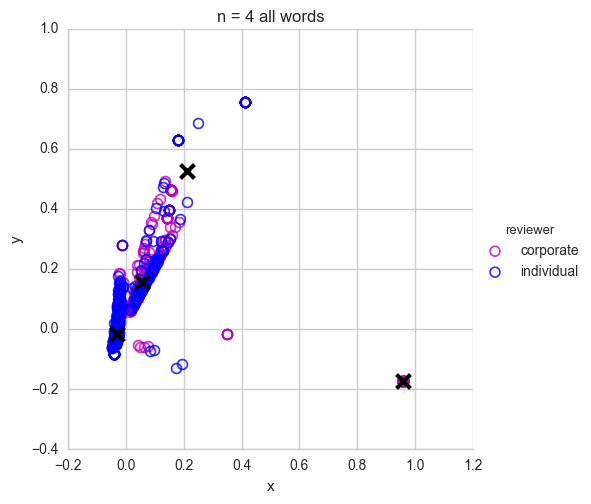

In [88]:
summary_all_words(dr4, 4)

Number of features:
10000

feature examples:
[u"'d", u"'m", u"'s", u"'s actual", u"'s best", u"'s best novel", u"'s best work", u"'s biographi", u"'s bit", u"'s classic"]


top ten terms in review summaries:

                     term  freq
4852         ~under cover  9999
8375               ~under  9998
5274                 zest  9997
3179                  zen  9996
5872                 zani  9995
6928         young reader  9994
7345          young peopl  9993
7436        young girl 's  9992
5238           young girl  9991
6622  young adult fantasi  9990

Number items in each cluster:
0    5557
3     375
1     130
2     119
4      46
Name: clusterID, dtype: int64




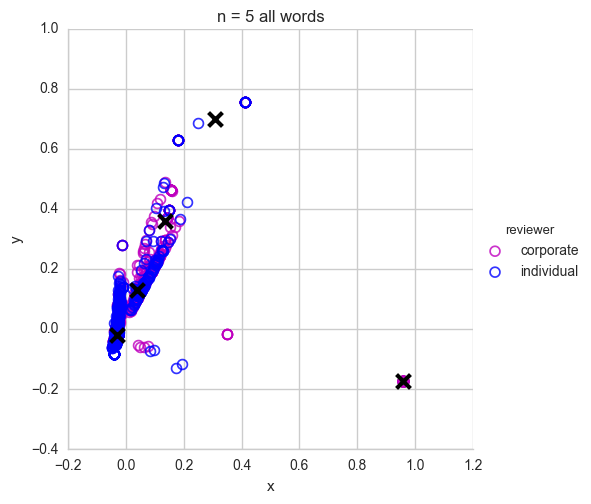

In [89]:
summary_all_words(dr4, 5)

Let's create a second function which will plot clusters using only genre words. 

In [90]:
vocab = ["romance", "mystery", "drama", "fiction", "teen", "teens", "biography", "story", "tale", "animal", "family", "fun", 
         "horror", "comedy", "action", "classic", "crime", "fantasy", "humor", "children", "kid", "families","conceptual",
        "innovation", "traumas", "style", "fashion", "social", "issues", "collection", "science", "period", "photographs",
        "historical", "murder", "suspenseful", "suspence", "inspirational", "graphic", "instructions", "thriller", "adventure",
        "western", "textbook", "legal", "action-packed", "career", "information", "contemporary",
        "mature", "adult", "military", "marine", "cops", "agriculture", "history", "photography","academic", "academy",
        "geography", "myth", "mythology", "paranormal", "essay", "self-help", "memoir", "autobiography", 
         "romantic", "fairy tale", "science fiction", "religion", "jesus"]

def summary_genre_words (dataframe, n_clusters): 
    
    tfidf_vectorizer_test = TfidfVectorizer(#max_df=1.0, max_features=5000,
                                     #min_df=0.0, 
                                        stop_words=set(my_stop_words),
                                     use_idf=True, 
                            tokenizer=tokenize_and_stem, ngram_range=(1, 3), vocabulary = vocab)
    
    tfidf_matrix_test = tfidf_vectorizer_test.fit_transform(dataframe.summary) 
    
    genre = tfidf_vectorizer_test.get_feature_names()
    
    print ("Number of features:")
    print (len(tfidf_vectorizer_test.get_feature_names()))
    print ("")
    print ("feature examples:") 
    print (genre[:10])  
    print ("")
    print ("")
    tfidf_vocab_genre = tfidf_vectorizer_test.vocabulary_
    tfidf_vocab_genre = pd.DataFrame(tfidf_vocab_genre.items(), columns = ['term', 'freq'])
    tfidf_vocab_genre = tfidf_vocab_genre.sort_values(by = 'freq', ascending = False)
    
    print ("top ten terms in review summaries:")
    print ("")
    print (tfidf_vocab_genre[:10])
    print ("")
    
    tfidf_matrix_test_dense = tfidf_matrix_test.todense()
    pca = PCA(n_components=2).fit(tfidf_matrix_test_dense)
    data2D_genre = pca.transform(tfidf_matrix_test_dense)
    
    frame2D_genre = pd.DataFrame(dict(x=data2D_genre[:,0], y=data2D_genre[:,1], reviewer=dataframe.reviewerID, 
                                  title = dataframe.title, name = dataframe.reviewerName, rank = dataframe['rank']))
    
    k_means = KMeans(n_clusters = n_clusters, n_init = 50)
    frame2D_genre ['clusterID'] = k_means.fit_predict(data2D_genre)
    
    print ("Number items in each cluster:")
    print (frame2D_genre.clusterID.value_counts())
    print ("")
    print ("")
    
    centroids_genre = k_means.cluster_centers_
    #centroids_ts = pca.transform(centroids_genre)
    
    sns.set_style("whitegrid")
    import matplotlib as mpl
    
    pts = np.linspace(0, np.pi * 2, 24)
    circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
    vert = np.r_[circ, circ[::-1] * .7]
    open_circle = mpl.path.Path(vert)
    sns.lmplot(x = 'x', y = 'y', hue = "reviewer", data=frame2D_genre, fit_reg= False, scatter_kws={"s": 70}, 
                markers=open_circle, palette=dict(corporate="m", individual="b")) #scatter_kws={"s": 50}
    plt.scatter(centroids_genre[:, 0], centroids_genre[:, 1], marker = "x", color = 'k', s=100, linewidths=3)
    plt.title ("n = " + str(n_clusters) + " genre words")
    plt.show()

Number of features:
72

feature examples:
['romance', 'mystery', 'drama', 'fiction', 'teen', 'teens', 'biography', 'story', 'tale', 'animal']


top ten terms in review summaries:

               term  freq
4             jesus    71
47         religion    70
30  science fiction    69
14       fairy tale    68
28         romantic    67
43    autobiography    66
53           memoir    65
6         self-help    64
0             essay    63
31       paranormal    62

Number items in each cluster:
0    5850
1     236
2     141
Name: clusterID, dtype: int64




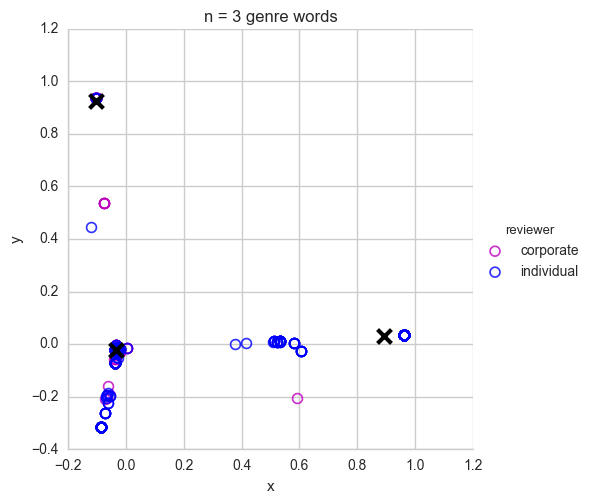

In [91]:
summary_genre_words(dr4, 3)

Number of features:
72

feature examples:
['romance', 'mystery', 'drama', 'fiction', 'teen', 'teens', 'biography', 'story', 'tale', 'animal']


top ten terms in review summaries:

               term  freq
4             jesus    71
47         religion    70
30  science fiction    69
14       fairy tale    68
28         romantic    67
43    autobiography    66
53           memoir    65
6         self-help    64
0             essay    63
31       paranormal    62

Number items in each cluster:
0    5710
1     236
2     141
3     140
Name: clusterID, dtype: int64




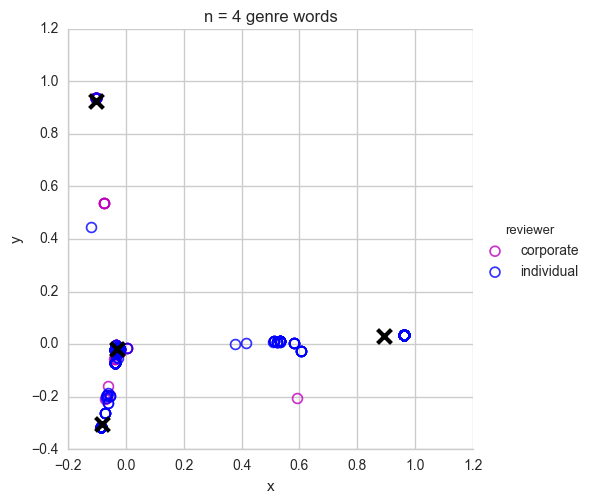

In [92]:
summary_genre_words(dr4, 4)

Now we can take more samples.

In [57]:
dr5 = dr.sample(n = 30000)
dr6 = dr5.replace([corporate_list], 'corporate')
dr5_corporate = dr6[dr6.reviewerID == "corporate"]
dr5_individual = dr6[dr6.reviewerID != "corporate"]
individual_list_1 = dr5_individual.reviewerID
dr5_individual = dr5_individual.replace([individual_list_1], "individual")
dr5_individual.head()

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,title,rank
128142,individual,"Shalom Freedman ""Shalom Freedman""",0380554755,61,67,2005-01-09 00:00:00 UTC,I read this book with a certain guilt as if pr...,454,4,Intimate portrait of artistic genius as moral ...,Life With Picasso,4765138.0
97202,individual,Dii,0373755074,5,5,2014-02-01 00:00:00 UTC,Looking for a contemporary cowboy romance that...,247,4,Love & Second Chances,Her Secret Cowboy (Harlequin American Romance\...,494101.0
34115,individual,Harriet Klausner,1416558411,9,9,2008-07-24 00:00:00 UTC,NFL superstar San Francisco Outlaws quarterbac...,315,4,fun second chance at love sports romance,Game for Anything,178717.0
107177,individual,Steven H. Propp,020163211X,6,7,2013-01-10 00:00:00 UTC,"In this 1991 book, Radha Rajagopal Sloss (daug...",631,5,DID KRISHNAMURTI HAVE A SECRET 25-YEAR AFFAIR?,Lives in the Shadow With J. Krishnamurti,990733.0
85271,individual,Charles Ashbacher,1434440729,2,3,2006-12-19 00:00:00 UTC,I have read many books of juvenile fiction and...,307,3,"Dialog and action seemed too artificial, even ...",The Young Pitcher,3822350.0


In [58]:
len(dr5_corporate)

9124

In [59]:
len(dr5_individual)

20876

In [60]:
dr6_individual = dr5_individual.sample(n = 9313)

In [61]:
dr7 = pd.concat([dr5_corporate, dr6_individual])

In [62]:
len(dr7)

18437

Number of features:
72

feature examples:
['romance', 'mystery', 'drama', 'fiction', 'teen', 'teens', 'biography', 'story', 'tale', 'animal']


top ten terms in review summaries:

               term  freq
4             jesus    71
47         religion    70
30  science fiction    69
14       fairy tale    68
28         romantic    67
43    autobiography    66
53           memoir    65
6         self-help    64
0             essay    63
31       paranormal    62

Number items in each cluster:
0    17313
1      557
2      435
3      132
Name: clusterID, dtype: int64




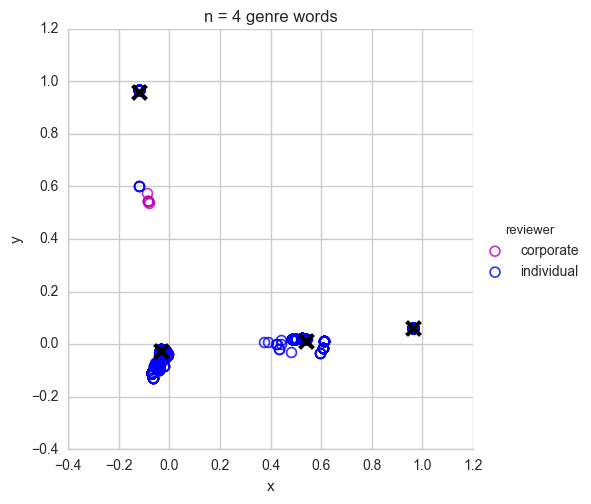

In [93]:
summary_genre_words(dr7, 4)

Number of features:
72

feature examples:
['romance', 'mystery', 'drama', 'fiction', 'teen', 'teens', 'biography', 'story', 'tale', 'animal']


top ten terms in review summaries:

               term  freq
4             jesus    71
47         religion    70
30  science fiction    69
14       fairy tale    68
28         romantic    67
43    autobiography    66
53           memoir    65
6         self-help    64
0             essay    63
31       paranormal    62

Number items in each cluster:
0    16655
4      658
1      557
2      435
3      132
Name: clusterID, dtype: int64




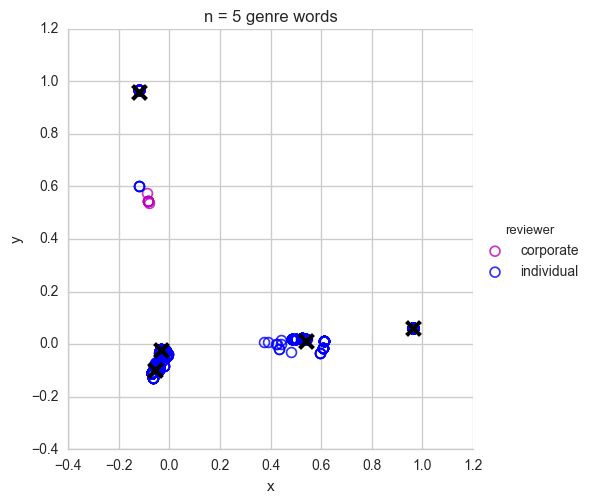

In [94]:
summary_genre_words(dr7, 5)

Number of features:
72

feature examples:
['romance', 'mystery', 'drama', 'fiction', 'teen', 'teens', 'biography', 'story', 'tale', 'animal']


top ten terms in review summaries:

               term  freq
4             jesus    71
47         religion    70
30  science fiction    69
14       fairy tale    68
28         romantic    67
43    autobiography    66
53           memoir    65
6         self-help    64
0             essay    63
31       paranormal    62

Number items in each cluster:
0    16655
4      658
1      557
2      425
3      132
5       10
Name: clusterID, dtype: int64




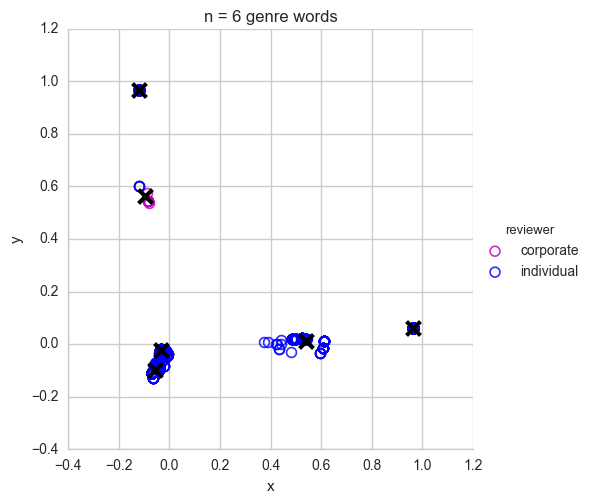

In [95]:
summary_genre_words(dr7, 6)

#### We can write a function which would look at review texts instead of review summary

In [96]:
vocab = ["romance", "mystery", "drama", "fiction", "teen", "teens", "biography", "story", "tale", "animal", "family", "fun", 
         "horror", "comedy", "action", "classic", "crime", "fantasy", "humor", "children", "kid", "families","conceptual",
        "innovation", "traumas", "style", "fashion", "social", "issues", "collection", "science", "period", "photographs",
        "historical", "murder", "suspenseful", "suspence", "inspirational", "graphic", "instructions", "thriller", "adventure",
        "western", "textbook", "legal", "action-packed", "career", "information", "contemporary",
        "mature", "adult", "military", "marine", "cops", "agriculture", "history", "photography","academic", "academy",
        "geography", "myth", "mythology", "paranormal", "essay", "self-help", "memoir", "autobiography", 
         "romantic", "fairy tale", "science fiction", "religion", "jesus"]

def text_genre_words (dataframe, n_clusters): 
    
    tfidf_vectorizer_test = TfidfVectorizer(#max_df=1.0, max_features=5000,
                                     #min_df=0.0, 
                                        stop_words=set(my_stop_words),
                                     use_idf=True, 
                            tokenizer=tokenize_and_stem, ngram_range=(1, 3), vocabulary = vocab)
    
    tfidf_matrix_test = tfidf_vectorizer_test.fit_transform(dataframe.reviewText) 
    
    genre = tfidf_vectorizer_test.get_feature_names()
    
    print ("Number of features:")
    print (len(tfidf_vectorizer_test.get_feature_names()))
    print ("")
    print ("feature examples:") 
    print (genre[:10])  
    print ("")
    print ("")
    tfidf_vocab_genre = tfidf_vectorizer_test.vocabulary_
    tfidf_vocab_genre = pd.DataFrame(tfidf_vocab_genre.items(), columns = ['term', 'freq'])
    tfidf_vocab_genre = tfidf_vocab_genre.sort_values(by = 'freq', ascending = False)
    
    print ("top ten terms in review texts:")
    print ("")
    print (tfidf_vocab_genre[:10])
    print ("")
    
    tfidf_matrix_test_dense = tfidf_matrix_test.todense()
    pca = PCA(n_components=2).fit(tfidf_matrix_test_dense)
    data2D_genre = pca.transform(tfidf_matrix_test_dense)
    
    frame2D_genre = pd.DataFrame(dict(x=data2D_genre[:,0], y=data2D_genre[:,1], reviewer=dataframe.reviewerID, 
                                  title = dataframe.title, name = dataframe.reviewerName, rank = dataframe['rank']))
    
    k_means = KMeans(n_clusters = n_clusters, n_init = 50)
    frame2D_genre ['clusterID'] = k_means.fit_predict(data2D_genre)
    
    print ("Number items in each cluster:")
    print (frame2D_genre.clusterID.value_counts())
    print ("")
    print ("")
    
    centroids_genre = k_means.cluster_centers_
    #centroids_ts = pca.transform(centroids_genre)
    
    sns.set_style("whitegrid")
    import matplotlib as mpl
    
    pts = np.linspace(0, np.pi * 2, 24)
    circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
    vert = np.r_[circ, circ[::-1] * .7]
    open_circle = mpl.path.Path(vert)
    sns.lmplot(x = 'x', y = 'y', hue = "reviewer", data=frame2D_genre, fit_reg= False, scatter_kws={"s": 70}, 
                markers=open_circle, palette=dict(corporate="m", individual="b")) #scatter_kws={"s": 50}
    plt.scatter(centroids_genre[:, 0], centroids_genre[:, 1], marker = "x", color = 'k', s=100, linewidths=3)
    plt.title ("n = " + str(n_clusters) + " genre words from texts")
    plt.show()

Number of features:
72

feature examples:
['romance', 'mystery', 'drama', 'fiction', 'teen', 'teens', 'biography', 'story', 'tale', 'animal']


top ten terms in review texts:

               term  freq
4             jesus    71
47         religion    70
30  science fiction    69
14       fairy tale    68
28         romantic    67
43    autobiography    66
53           memoir    65
6         self-help    64
0             essay    63
31       paranormal    62

Number items in each cluster:
0    4687
2     660
1     530
3     350
Name: clusterID, dtype: int64




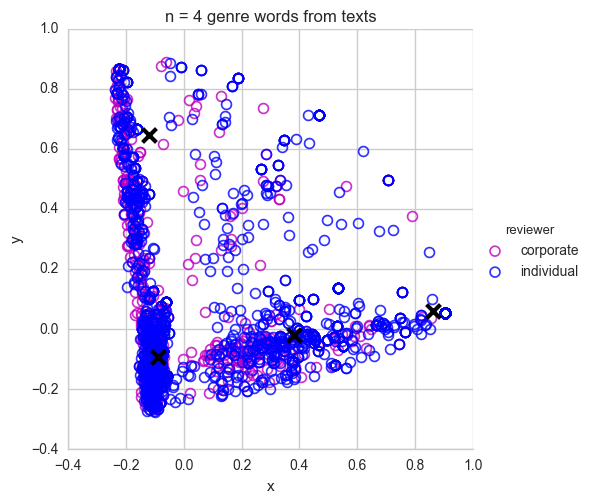

In [97]:
text_genre_words(dr4, 4)

Number of features:
72

feature examples:
['romance', 'mystery', 'drama', 'fiction', 'teen', 'teens', 'biography', 'story', 'tale', 'animal']


top ten terms in review texts:

               term  freq
4             jesus    71
47         religion    70
30  science fiction    69
14       fairy tale    68
28         romantic    67
43    autobiography    66
53           memoir    65
6         self-help    64
0             essay    63
31       paranormal    62

Number items in each cluster:
0    4654
4     512
3     366
2     350
1     345
Name: clusterID, dtype: int64




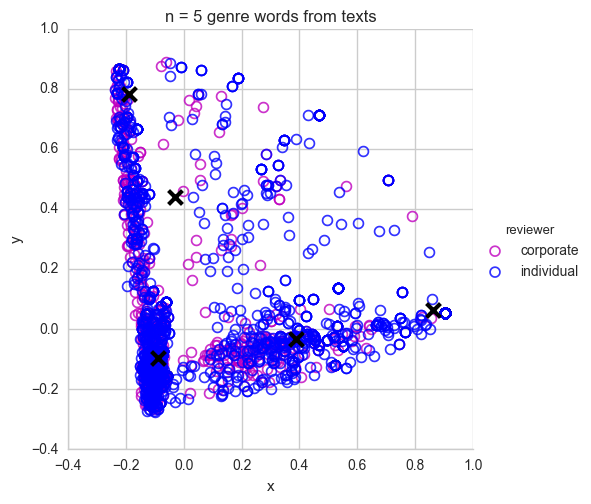

In [98]:
text_genre_words(dr4, 5)

Number of features:
72

feature examples:
['romance', 'mystery', 'drama', 'fiction', 'teen', 'teens', 'biography', 'story', 'tale', 'animal']


top ten terms in review texts:

               term  freq
4             jesus    71
47         religion    70
30  science fiction    69
14       fairy tale    68
28         romantic    67
43    autobiography    66
53           memoir    65
6         self-help    64
0             essay    63
31       paranormal    62

Number items in each cluster:
0    4649
3     509
1     341
5     314
2     295
4     119
Name: clusterID, dtype: int64




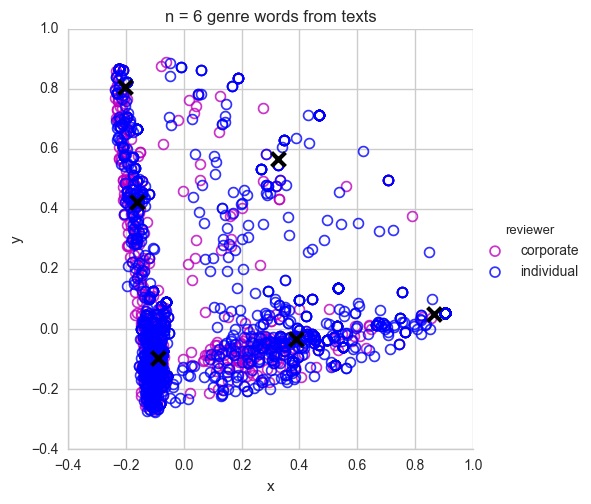

In [99]:
text_genre_words(dr4, 6)

Number of features:
72

feature examples:
['romance', 'mystery', 'drama', 'fiction', 'teen', 'teens', 'biography', 'story', 'tale', 'animal']


top ten terms in review texts:

               term  freq
4             jesus    71
47         religion    70
30  science fiction    69
14       fairy tale    68
28         romantic    67
43    autobiography    66
53           memoir    65
6         self-help    64
0             essay    63
31       paranormal    62

Number items in each cluster:
0    14095
2     1543
4     1478
1      905
3      416
Name: clusterID, dtype: int64




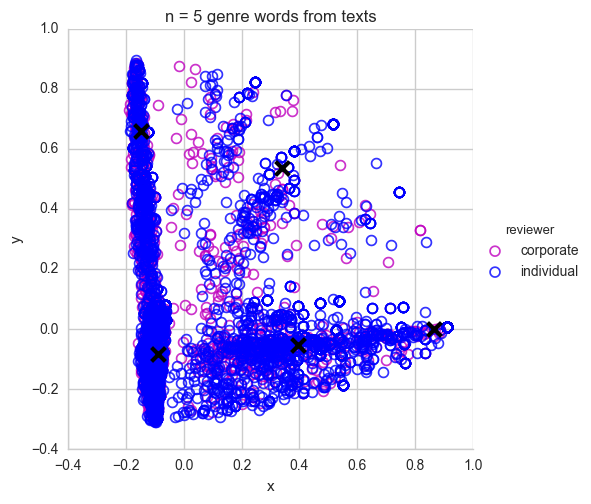

In [100]:
text_genre_words(dr7, 5) # This is with 20,000 review texts

### Let's look at top words per clusters, respective reviewers and books

<p> Let's start with summary of dr4 which contains equal number of corporate and individual reviews (3128 each). 

In [71]:
vocab = ["romance", "mystery", "drama", "fiction", "teen", "teens", "biography", "story", "tale", "animal", "family", "fun", 
         "horror", "comedy", "action", "classic", "crime", "fantasy", "humor", "children", "kid", "families","conceptual",
        "innovation", "traumas", "style", "fashion", "social", "issues", "collection", "science", "period", "photographs",
        "historical", "murder", "suspenseful", "suspence", "inspirational", "graphic", "instructions", "thriller", "adventure",
        "western", "textbook", "legal", "action-packed", "career", "information", "contemporary",
        "mature", "adult", "military", "marine", "cops", "agriculture", "history", "photography","academic", "academy",
        "geography", "myth", "mythology", "paranormal", "essay", "self-help", "memoir", "autobiography", 
         "romantic", "fairy tale", "science fiction", "religion", "jesus"]
#vocab = ["romance"]
tfidf_vectorizer_genre = TfidfVectorizer(#max_df=1.0, max_features=5000,
                                     #min_df=0.0, 
                                        stop_words=set(my_stop_words),
                                     use_idf=True, 
                            tokenizer=tokenize_and_stem, ngram_range=(1, 3), vocabulary = vocab)
%time tfidf_matrix_genre = tfidf_vectorizer_genre.fit_transform(dr4.summary) 
#tfidf_matrix_genre_dense = tfidf_matrix_genre.todense()
terms = tfidf_vectorizer_genre.get_feature_names()

Wall time: 2.11 s


In [72]:
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from __future__ import print_function

num_clusters = 5 # 5 is taken here because for dr4.summary it gets all words (looks at PCA visualization)
km = KMeans(n_clusters=num_clusters, random_state= 123, n_init=20)
print ("K-means fit:") 
%time km.fit(tfidf_matrix_genre)
clusters = km.labels_.tolist()

joblib.dump(km,  'doc_cluster.pkl')
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()
dr4['clusterName'] = clusters
print()
print ("Number of items in each cluster:")
print (dr4.clusterName.value_counts())
dr4 = dr4.set_index('clusterName')
print()
print("Top terms per cluster:")
print()
    
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
        
for i in range(num_clusters):
    print("Cluster %d top words:" % i, end='')

    for ind in order_centroids[i, :3]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace

    #print("Cluster %d reviewers:" % i, end='')
    corporate = []
    individual = []
    for reviewer in dr4.ix[i]['reviewerID'].values.tolist():
        if reviewer == 'corporate':
            corporate.append(reviewer)
        else:
            individual.append(reviewer)
    print ("Number of corporate reviewers: ", len (corporate))  
    print ("Number of individual reviewers:", len(individual))
        #print(' %s,' % reviewer, end='')
    print() #add whitespace
    print() #add whitespace

    print("Cluster %d books:" % i, end='')
    for book in dr4.ix[i]['title'][:20]:
        print(' %s,' % book, end='')
    print() #add whitespace
    print() #add whitespace

print()
print()

K-means fit:
Wall time: 295 ms

Number of items in each cluster:
1    5616
2     229
3     141
0     136
4     105
Name: clusterName, dtype: int64

Top terms per cluster:

Cluster 0 top words: tale, horror, fiction,

Number of corporate reviewers:  36
Number of individual reviewers: 100


Cluster 0 books: The First Phone Call from Heaven: A Novel, Oil Dusk: A Peak Oil Story, Kill Me (Alan Gregory), The Girlfriend Curse, The Polish Woman: A Novel, The Magician of Lublin: A Novel, The Secret Circus, Nightmare Range: The Collected Sueno and Bascom Short Stories, Pancakes For Supper, Canadian Meds, The Pied Pipers of Wall Street: How Analysts Sell You Down the River, The Uses of Enchantment: A Novel, THE TEMPLARS, TWO KINGS, AND A POPE, The Coal Tattoo: A Novel, Find Me (A Mallory Novel), Johnny Cash: The Life, The Gift: A Novel, The Snow Queen (Tales of the Five Hundred Kingdoms, Book 4), A Very Private Gentleman: A Novel, Abbey the Cavi in Miami Beach,

Cluster 1 top words: fiction, dram

**We can see some distinctions between number of corporate vs. individual reviews in some word clusters.** For example, look at cluster 3 above.

 #### what happens with 4 clusters?

In [73]:
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from __future__ import print_function

num_clusters = 4
km = KMeans(n_clusters=num_clusters, random_state= 123, n_init=20)
print ("K-means fit:") 
%time km.fit(tfidf_matrix_genre)
clusters = km.labels_.tolist()

joblib.dump(km,  'doc_cluster.pkl')
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()
dr4['clusterName'] = clusters
print()
print ("Number of items in each cluster:")
print (dr4.clusterName.value_counts())
dr4 = dr4.set_index('clusterName')
print()
print("Top terms per cluster:")
print()
    
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
        
for i in range(num_clusters):
    print("Cluster %d top words:" % i, end='')

    for ind in order_centroids[i, :3]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace

    #print("Cluster %d reviewers:" % i, end='')
    corporate = []
    individual = []
    for reviewer in dr4.ix[i]['reviewerID'].values.tolist():
        if reviewer == 'corporate':
            corporate.append(reviewer)
        else:
            individual.append(reviewer)
    print ("Numbers of corporate reviewers: ", len (corporate))  
    print ("Numbers of individual reviewers:", len(individual))
        #print(' %s,' % reviewer, end='')
    print() #add whitespace
    print() #add whitespace

    print("Cluster %d books:" % i, end='')
    for book in dr4.ix[i]['title'][:20]:
        print(' %s,' % book, end='')
    print() #add whitespace
    print() #add whitespace

print()
print()

K-means fit:
Wall time: 240 ms

Number of items in each cluster:
0    5709
2     235
1     142
3     141
Name: clusterName, dtype: int64

Top terms per cluster:

Cluster 0 top words: fun, fiction, drama,

Numbers of corporate reviewers:  2881
Numbers of individual reviewers: 2828


Cluster 0 books: Lonely Planet Central America (Shoestring Travel Guide), For the First Time, Storm (Elemental), The Drawing Breakthrough Book: A Shortcut to Artistic Excellence, The Beach House (The Beach House Series, Book 1), Keep It Real: Everything You Need to Know About Researching and Writing Creative Nonfiction, Mind Wide Open: Your Brain and the Neuroscience of Everyday Life, Chicago Assassin: The Life and Legend of Machine Gun&quot;&quot; Jack McGurn and the Chicago Beer Wars of the Roaring Twenties&quot;&quot;, Slow Motion: Capture The Sunrise\Dark and Dashing (Arabesque), Black Valley, The Accidental Empire: Israel and the Birth of the Settlements, 1967-1977, L.A. Outlaws (Charlie Hood Novel), Mo

### Analysis with more samples 
dr7 contains 18000 entries with 50% corporate and 50% individual reviews

In [81]:
vocab = ["romance", "mystery", "drama", "fiction", "teen", "teens", "biography", "story", "tale", "animal", "family", "fun", 
         "horror", "comedy", "action", "classic", "crime", "fantasy", "humor", "children", "kid", "families","conceptual",
        "innovation", "traumas", "style", "fashion", "social", "issues", "collection", "science", "period", "photographs",
        "historical", "murder", "suspenseful", "suspence", "inspirational", "graphic", "instructions", "thriller", "adventure",
        "western", "textbook", "legal", "action-packed", "career", "information", "contemporary",
        "mature", "adult", "military", "marine", "cops", "agriculture", "history", "photography","academic", "academy",
        "geography", "myth", "mythology", "paranormal", "essay", "self-help", "memoir", "autobiography", 
         "romantic", "fairy tale", "science fiction", "religion", "jesus"]
#vocab = ["romance"]
tfidf_vectorizer_genre = TfidfVectorizer(#max_df=1.0, max_features=5000,
                                     #min_df=0.0, 
                                        stop_words=set(my_stop_words),
                                     use_idf=True, 
                            tokenizer=tokenize_and_stem, ngram_range=(1, 3), vocabulary = vocab)
%time tfidf_matrix_genre = tfidf_vectorizer_genre.fit_transform(dr7.summary) 
#tfidf_matrix_genre_dense = tfidf_matrix_genre.todense()
terms = tfidf_vectorizer_genre.get_feature_names()

Wall time: 6.38 s


In [82]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in dr7.summary:
    allwords_stemmed = tokenize_and_stem(i) 
    totalvocab_stemmed.extend(allwords_stemmed) 

    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

vocab_frame1 = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
vocab_frame1 = vocab_frame.drop(add_text)
vocab_frame1.head()

,words
perfect,perfect
for,for
young,young
travel,travelers
in,in


In [83]:
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from __future__ import print_function

num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state= 123, n_init=20)
print ("K-means fit:") 
%time km.fit(tfidf_matrix_genre)
clusters = km.labels_.tolist()

joblib.dump(km,  'doc_cluster.pkl')
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()
dr7['clusterName'] = clusters
print()
print ("Number of items in each cluster:")
print (dr7.clusterName.value_counts())
dr7 = dr7.set_index('clusterName')
print()
print("Top terms per cluster:")
print()
    
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
        
for i in range(num_clusters):
    print("Cluster %d top words:" % i, end='')

    for ind in order_centroids[i, :3]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame1.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace

    #print("Cluster %d reviewers:" % i, end='')
    corporate = []
    individual = []
    for reviewer in dr7.ix[i]['reviewerID'].values.tolist():
        if reviewer == 'corporate':
            corporate.append(reviewer)
        else:
            individual.append(reviewer)
    print ("Numbers of corporate reviewers: ", len (corporate))  
    print ("Numbers of individual reviewers:", len(individual))
        #print(' %s,' % reviewer, end='')
    print() #add whitespace
    print() #add whitespace

    print("Cluster %d books:" % i, end='')
    for book in dr7.ix[i]['title'][:20]:
        print(' %s,' % book, end='')
    print() #add whitespace
    print() #add whitespace

print()
print()

K-means fit:
Wall time: 827 ms

Number of items in each cluster:
0    16651
2      666
3      432
4      358
1      330
Name: clusterName, dtype: int64

Top terms per cluster:

Cluster 0 top words: fiction, drama, humorous,

Numbers of corporate reviewers:  8311
Numbers of individual reviewers: 8340


Cluster 0 books: FCO: Fundamental Chess Openings, The Death of Bees: A Novel, The Sleep Ponies, The Anti-American Manifesto, Ambush Alley: The Most Extraordinary Battle of the Iraq War, Florence Nightingale: The Making of an Icon, What to Keep: A Novel, Veeps: Profiles in Insignificance, REST in Practice: Hypermedia and Systems Architecture, The Name of the Wind, That Old Black Magic (Piper Donovan/Wedding Cake Mysteries), No Holding Back, Strange Terrain: A Poetry Handbook for the Reluctant Reader, Steve Martin: The Magic Years, The Truth (with jokes), The Filthy Thirteen: From the Dustbowl to Hitler's Eagle's Nest :The True Story of the101st Airborne's Most Legendary Squad of Combat Par

Here again we see some distinction. Let's try with number of cluster = 6.

In [84]:
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from __future__ import print_function

num_clusters = 6
km = KMeans(n_clusters=num_clusters, random_state= 123, n_init=20)
print ("K-means fit:") 
%time km.fit(tfidf_matrix_genre)
clusters = km.labels_.tolist()

joblib.dump(km,  'doc_cluster.pkl')
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()
dr7['clusterName'] = clusters
print()
print ("Number of items in each cluster:")
print (dr7.clusterName.value_counts())
dr7 = dr7.set_index('clusterName')
print()
print("Top terms per cluster:")
print()
    
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
        
for i in range(num_clusters):
    print("Cluster %d top words:" % i, end='')

    for ind in order_centroids[i, :3]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame1.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace

    #print("Cluster %d reviewers:" % i, end='')
    corporate = []
    individual = []
    for reviewer in dr7.ix[i]['reviewerID'].values.tolist():
        if reviewer == 'corporate':
            corporate.append(reviewer)
        else:
            individual.append(reviewer)
    print ("Numbers of corporate reviewers: ", len (corporate))  
    print ("Numbers of individual reviewers:", len(individual))
        #print(' %s,' % reviewer, end='')
    print() #add whitespace
    print() #add whitespace

    print("Cluster %d books:" % i, end='')
    for book in dr7.ix[i]['title'][:20]:
        print(' %s,' % book, end='')
    print() #add whitespace
    print() #add whitespace

print()
print()

K-means fit:
Wall time: 792 ms

Number of items in each cluster:
0    16450
2      635
4      432
5      352
3      324
1      244
Name: clusterName, dtype: int64

Top terms per cluster:

Cluster 0 top words: drama, humorous, action,

Numbers of corporate reviewers:  8226
Numbers of individual reviewers: 8224


Cluster 0 books: FCO: Fundamental Chess Openings, The Death of Bees: A Novel, The Sleep Ponies, The Anti-American Manifesto, Ambush Alley: The Most Extraordinary Battle of the Iraq War, Florence Nightingale: The Making of an Icon, What to Keep: A Novel, Veeps: Profiles in Insignificance, REST in Practice: Hypermedia and Systems Architecture, The Name of the Wind, That Old Black Magic (Piper Donovan/Wedding Cake Mysteries), No Holding Back, Strange Terrain: A Poetry Handbook for the Reluctant Reader, Steve Martin: The Magic Years, The Truth (with jokes), The Filthy Thirteen: From the Dustbowl to Hitler's Eagle's Nest :The True Story of the101st Airborne's Most Legendary Squad of 

#### We can also try with review texts, and let's do it with dr4 (6000 samples)

In [77]:
vocab = ["romance", "mystery", "drama", "fiction", "teen", "teens", "biography", "story", "tale", "animal", "family", "fun", 
         "horror", "comedy", "action", "classic", "crime", "fantasy", "humor", "children", "kid", "families","conceptual",
        "innovation", "traumas", "style", "fashion", "social", "issues", "collection", "science", "period", "photographs",
        "historical", "murder", "suspenseful", "suspence", "inspirational", "graphic", "instructions", "thriller", "adventure",
        "western", "textbook", "legal", "action-packed", "career", "information", "contemporary",
        "mature", "adult", "military", "marine", "cops", "agriculture", "history", "photography","academic", "academy",
        "geography", "myth", "mythology", "paranormal", "essay", "self-help", "memoir", "autobiography", 
         "romantic", "fairy tale", "science fiction", "religion", "jesus"]
#vocab = ["romance"]
tfidf_vectorizer_genre = TfidfVectorizer(#max_df=1.0, max_features=5000,
                                     #min_df=0.0, 
                                        stop_words=set(my_stop_words),
                                     use_idf=True, 
                            tokenizer=tokenize_and_stem, ngram_range=(1, 3), vocabulary = vocab)
%time tfidf_matrix_genre = tfidf_vectorizer_genre.fit_transform(dr4.reviewText) 
#tfidf_matrix_genre_dense = tfidf_matrix_genre.todense()
terms = tfidf_vectorizer_genre.get_feature_names()

Wall time: 59.5 s


In [78]:
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from __future__ import print_function

num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state= 123, n_init=20)
print ("K-means fit:") 
%time km.fit(tfidf_matrix_genre)
clusters = km.labels_.tolist()

joblib.dump(km,  'doc_cluster.pkl')
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()
dr4['clusterName'] = clusters
print()
print ("Number of items in each cluster:")
print (dr4.clusterName.value_counts())
dr4 = dr4.set_index('clusterName')
print()
print("Top terms per cluster:")
print()
    
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
        
for i in range(num_clusters):
    print("Cluster %d top words:" % i, end='')

    for ind in order_centroids[i, :3]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace

    #print("Cluster %d reviewers:" % i, end='')
    corporate = []
    individual = []
    for reviewer in dr4.ix[i]['reviewerID'].values.tolist():
        if reviewer == 'corporate':
            corporate.append(reviewer)
        else:
            individual.append(reviewer)
    print ("Numbers of corporate reviewers: ", len (corporate))  
    print ("Numbers of individual reviewers:", len(individual))
        #print(' %s,' % reviewer, end='')
    print() #add whitespace
    print() #add whitespace

    print("Cluster %d books:" % i, end='')
    for book in dr4.ix[i]['title'][:20]:
        print(' %s,' % book, end='')
    print() #add whitespace
    print() #add whitespace

print()
print()

K-means fit:
Wall time: 1.43 s

Number of items in each cluster:
0    4138
3     627
4     618
1     437
2     407
Name: clusterName, dtype: int64

Top terms per cluster:

Cluster 0 top words: action, fiction, style,

Numbers of corporate reviewers:  2260
Numbers of individual reviewers: 1878


Cluster 0 books: Lonely Planet Central America (Shoestring Travel Guide), For the First Time, Storm (Elemental), The Drawing Breakthrough Book: A Shortcut to Artistic Excellence, The Beach House (The Beach House Series, Book 1), Keep It Real: Everything You Need to Know About Researching and Writing Creative Nonfiction, Mind Wide Open: Your Brain and the Neuroscience of Everyday Life, Black Valley, The Accidental Empire: Israel and the Birth of the Settlements, 1967-1977, L.A. Outlaws (Charlie Hood Novel), Stones into Schools: Promoting Peace with Education in Afghanistan and Pakistan, 1635: The Tangled Web (Ring of Fire), The Confederate States of America: What Might Have Been, Age of Miracles,

In [79]:
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from __future__ import print_function

num_clusters = 4
km = KMeans(n_clusters=num_clusters, random_state= 123, n_init=20)
print ("K-means fit:") 
%time km.fit(tfidf_matrix_genre)
clusters = km.labels_.tolist()

joblib.dump(km,  'doc_cluster.pkl')
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()
dr4['clusterName'] = clusters
print()
print ("Number of items in each cluster:")
print (dr4.clusterName.value_counts())
dr4 = dr4.set_index('clusterName')
print()
print("Top terms per cluster:")
print()
    
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
        
for i in range(num_clusters):
    print("Cluster %d top words:" % i, end='')

    for ind in order_centroids[i, :3]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace

    #print("Cluster %d reviewers:" % i, end='')
    corporate = []
    individual = []
    for reviewer in dr4.ix[i]['reviewerID'].values.tolist():
        if reviewer == 'corporate':
            corporate.append(reviewer)
        else:
            individual.append(reviewer)
    print ("Numbers of corporate reviewers: ", len (corporate))  
    print ("Numbers of individual reviewers:", len(individual))
        #print(' %s,' % reviewer, end='')
    print() #add whitespace
    print() #add whitespace

    print("Cluster %d books:" % i, end='')
    for book in dr4.ix[i]['title'][:20]:
        print(' %s,' % book, end='')
    print() #add whitespace
    print() #add whitespace

print()
print()

K-means fit:
Wall time: 1.35 s

Number of items in each cluster:
2    4422
1     695
0     651
3     459
Name: clusterName, dtype: int64

Top terms per cluster:

Cluster 0 top words: murder, thriller, crime,

Numbers of corporate reviewers:  274
Numbers of individual reviewers: 377


Cluster 0 books: Shadow of Power: A Paul Madriani Novel (Paul Madriani Novels), Chicago Assassin: The Life and Legend of Machine Gun&quot;&quot; Jack McGurn and the Chicago Beer Wars of the Roaring Twenties&quot;&quot;, Money, Money, Money: A Novel of the 87th Precinct (87th Precinct Mysteries), Pineapple Grenade: A Novel, Pursuit, Concealed in Death, The Disappeared, Force of Nature (A Joe Pickett Novel), Ted Bundy: Conversations with a Killer (The Death Row Interviews), The Vigilantes (Badge of Honor), Hour Game (King &amp; Maxwell), Four Blind Mice, The Death Trust, True Detectives: A Novel, Alamut, Death of a Policeman (Hamish Macbeth Mystery), Turn of Mind, A Romantic Way to Die (Sheriff Dan Rhodes My

### Summary

<li> We do not see a visible separation in 2D PCA between individual and corporate accounts. However, we did find some interesting distinctions between these accounts when we used a vocabulary list containing genre lists. We will look at the clustering in part III of this notebook where we will not categorize individual and corporate accounts to see which reviewers can be clustered together. 